In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Área destinada à colheita (Hectares)
df_area_dest = pd.read_excel(
    "tabela1613.xlsx",
    sheet_name="Área destinada à colheita (H...",
    skiprows=3
)

df_area_dest = df_area_dest.dropna(how='all')
df_area_dest = df_area_dest[df_area_dest.iloc[:, 0] == 'Espírito Santo']
df_area_dest = df_area_dest.rename(columns={'Unnamed: 0': 'Estado'})

df_area_dest_long = df_area_dest.melt(
    id_vars='Estado',
    var_name='Ano',
    value_name='area_destinada_ha'
)

df_area_dest_long['Ano'] = df_area_dest_long['Ano'].astype(int)
df_area_dest_long['area_destinada_ha'] = pd.to_numeric(
    df_area_dest_long['area_destinada_ha'],
    errors='coerce'
)

df_area_dest_final = df_area_dest_long[['Ano', 'area_destinada_ha']]


In [3]:
#Área colhida(hectares)
df_area_colhida = pd.read_excel(
    "tabela1613.xlsx",
    sheet_name="Área colhida (Hectares)",
    skiprows=3
)

df_area_colhida = df_area_colhida.dropna(how='all')
df_area_colhida = df_area_colhida[df_area_colhida.iloc[:, 0] == 'Espírito Santo']
df_area_colhida = df_area_colhida.rename(columns={'Unnamed: 0': 'Estado'})

df_area_colhida_long = df_area_colhida.melt(
    id_vars='Estado',
    var_name='Ano',
    value_name='area_colhida_ha'
)

df_area_colhida_long['Ano'] = df_area_colhida_long['Ano'].astype(int)
df_area_colhida_long['area_colhida_ha'] = pd.to_numeric(
    df_area_colhida_long['area_colhida_ha'],
    errors='coerce'
)

df_area_colhida_final = df_area_colhida_long[['Ano', 'area_colhida_ha']]


In [4]:
#Quantidade produzida (toneladas)
df_producao = pd.read_excel(
    "tabela1613.xlsx",
    sheet_name="Quantidade produzida (Tonela...",
    skiprows=3
)

df_producao = df_producao.dropna(how='all')
df_producao = df_producao[df_producao.iloc[:, 0] == 'Espírito Santo']
df_producao = df_producao.rename(columns={'Unnamed: 0': 'Estado'})

df_producao_long = df_producao.melt(
    id_vars='Estado',
    var_name='Ano',
    value_name='producao_ton'
)

df_producao_long['Ano'] = df_producao_long['Ano'].astype(int)
df_producao_long['producao_ton'] = pd.to_numeric(
    df_producao_long['producao_ton'],
    errors='coerce'
)

df_producao_final = df_producao_long[['Ano', 'producao_ton']]


In [5]:
#Valor da produção (Mil Reais)
df_valor = pd.read_excel(
    "tabela1613.xlsx",
    sheet_name="Valor da produção (Mil Reais)",
    skiprows=3
)

df_valor = df_valor.dropna(how='all')
df_valor = df_valor[df_valor.iloc[:, 0] == 'Espírito Santo']
df_valor = df_valor.rename(columns={'Unnamed: 0': 'Estado'})

df_valor_long = df_valor.melt(
    id_vars='Estado',
    var_name='Ano',
    value_name='valor_producao_mil_reais'
)

df_valor_long['Ano'] = df_valor_long['Ano'].astype(int)
df_valor_long['valor_producao_mil_reais'] = pd.to_numeric(
    df_valor_long['valor_producao_mil_reais'],
    errors='coerce'
)

df_valor_final = df_valor_long[['Ano', 'valor_producao_mil_reais']]


In [6]:
df_area_dest_final.describe()
df_area_colhida_final.describe()
df_producao_final.describe()
df_valor_final.head()


,Ano,valor_producao_mil_reais
0,2012,2309354
1,2013,1893099
2,2014,2253175
3,2015,2131298
4,2016,1890452


In [7]:
#Integração dos dados (SEM análise ainda)
df_final = df_area_dest_final \
    .merge(df_area_colhida_final, on='Ano') \
    .merge(df_producao_final, on='Ano') \
    .merge(df_valor_final, on='Ano')

df_final.head(15)


,Ano,area_destinada_ha,area_colhida_ha,producao_ton,valor_producao_mil_reais
0,2012,297702,297702,588739,2309354
1,2013,294753,294753,489506,1893099
2,2014,289824,289824,596178,2253175
3,2015,290135,290135,450174,2131298
4,2016,275919,274419,304008,1890452
5,2017,256884,256884,373711,2403299
6,2018,256252,256252,589924,3056610
7,2019,257939,257939,640287,2877998
8,2020,261982,261982,568963,3204507
9,2021,264427,264407,684166,5414587


In [8]:
#criando variaveis derivadas
df_final['produtividade_ton_ha'] = (df_final['producao_ton'] / df_final['area_colhida_ha']
                                      )


In [10]:
df_final['valor_med_kg'] = ((df_final['valor_producao_mil_reais'] / df_final['producao_ton']))

In [11]:
df_final['valor_med_saca_cafe'] = (df_final['valor_med_kg']*60)


In [12]:
df_final.head(15)



,Ano,area_destinada_ha,area_colhida_ha,producao_ton,valor_producao_mil_reais,produtividade_ton_ha,valor_med_kg,valor_med_saca_cafe
0,2012,297702,297702,588739,2309354,1.977612,3.922543,235.352576
1,2013,294753,294753,489506,1893099,1.660733,3.867366,232.041977
2,2014,289824,289824,596178,2253175,2.057035,3.779366,226.761974
3,2015,290135,290135,450174,2131298,1.551602,4.734387,284.063229
4,2016,275919,274419,304008,1890452,1.107824,6.218428,373.105708
5,2017,256884,256884,373711,2403299,1.454785,6.430902,385.854149
6,2018,256252,256252,589924,3056610,2.302124,5.181362,310.881741
7,2019,257939,257939,640287,2877998,2.482319,4.494856,269.691373
8,2020,261982,261982,568963,3204507,2.171764,5.632189,337.931324
9,2021,264427,264407,684166,5414587,2.587549,7.914142,474.848531


In [13]:
df_final.sort_values('Ano')

,Ano,area_destinada_ha,area_colhida_ha,producao_ton,valor_producao_mil_reais,produtividade_ton_ha,valor_med_kg,valor_med_saca_cafe
0,2012,297702,297702,588739,2309354,1.977612,3.922543,235.352576
1,2013,294753,294753,489506,1893099,1.660733,3.867366,232.041977
2,2014,289824,289824,596178,2253175,2.057035,3.779366,226.761974
3,2015,290135,290135,450174,2131298,1.551602,4.734387,284.063229
4,2016,275919,274419,304008,1890452,1.107824,6.218428,373.105708
5,2017,256884,256884,373711,2403299,1.454785,6.430902,385.854149
6,2018,256252,256252,589924,3056610,2.302124,5.181362,310.881741
7,2019,257939,257939,640287,2877998,2.482319,4.494856,269.691373
8,2020,261982,261982,568963,3204507,2.171764,5.632189,337.931324
9,2021,264427,264407,684166,5414587,2.587549,7.914142,474.848531


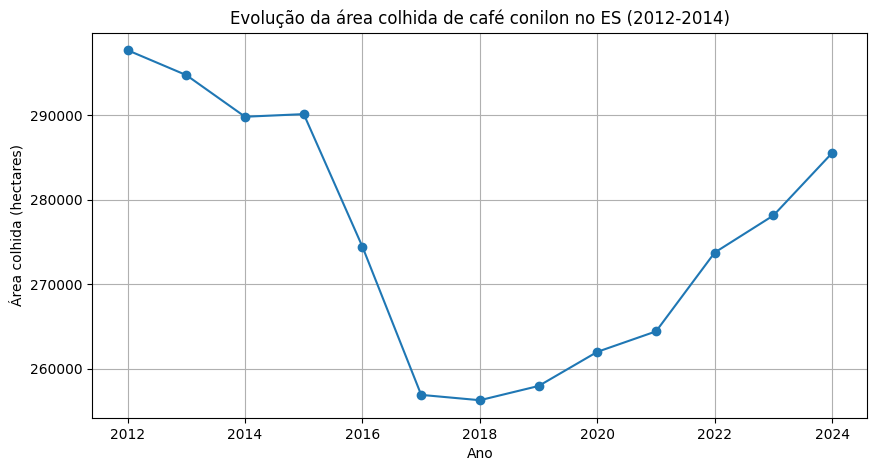

In [14]:
#graficos

plt.figure(figsize=(10,5))
plt.plot(df_final['Ano'], df_final['area_colhida_ha'], marker='o')

plt.title('Evolução da área colhida de café conilon no ES (2012-2014)')
plt.xlabel('Ano')
plt.ylabel('Área colhida (hectares)')
plt.grid(True)

plt.show()

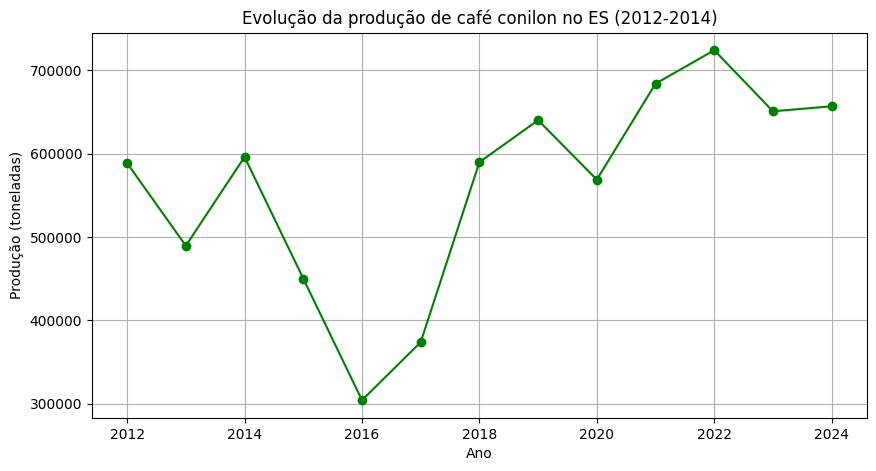

In [15]:
plt.figure(figsize=(10,5))
plt.plot(df_final['Ano'], df_final['producao_ton'], marker='o', color='green')

plt.title('Evolução da produção de café conilon no ES (2012-2014)')
plt.xlabel('Ano')
plt.ylabel('Produção (toneladas)')
plt.grid(True)

plt.show()

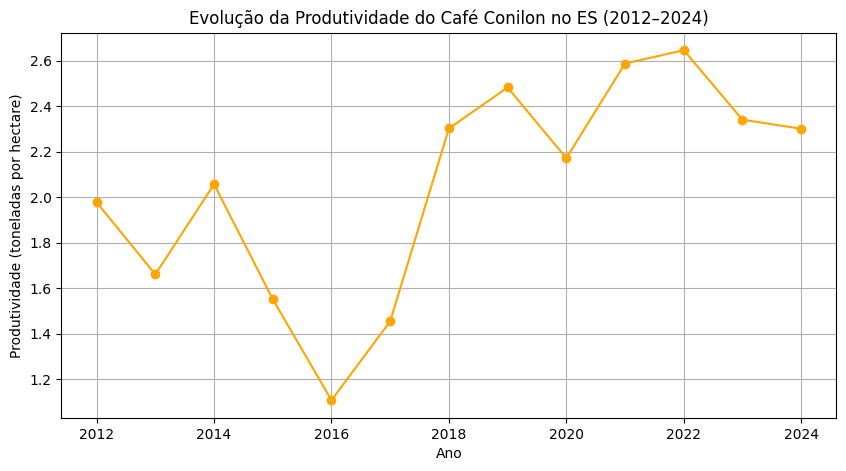

In [16]:
plt.figure(figsize=(10,5))
plt.plot(df_final['Ano'], df_final['produtividade_ton_ha'], marker='o', color='orange')

plt.title('Evolução da Produtividade do Café Conilon no ES (2012–2024)')
plt.xlabel('Ano')
plt.ylabel('Produtividade (toneladas por hectare)')
plt.grid(True)

plt.show()


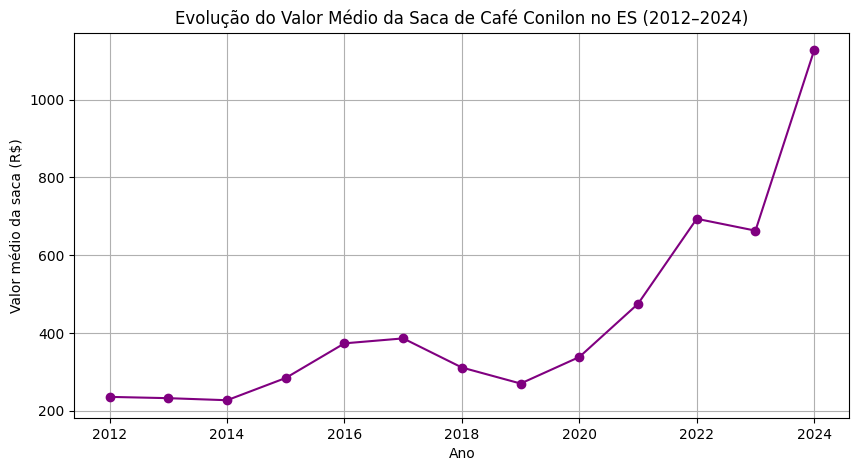

In [17]:
plt.figure(figsize=(10,5))
plt.plot(df_final['Ano'], df_final['valor_med_saca_cafe'], marker='o', color='purple')

plt.title('Evolução do Valor Médio da Saca de Café Conilon no ES (2012–2024)')
plt.xlabel('Ano')
plt.ylabel('Valor médio da saca (R$)')
plt.grid(True)

plt.show()


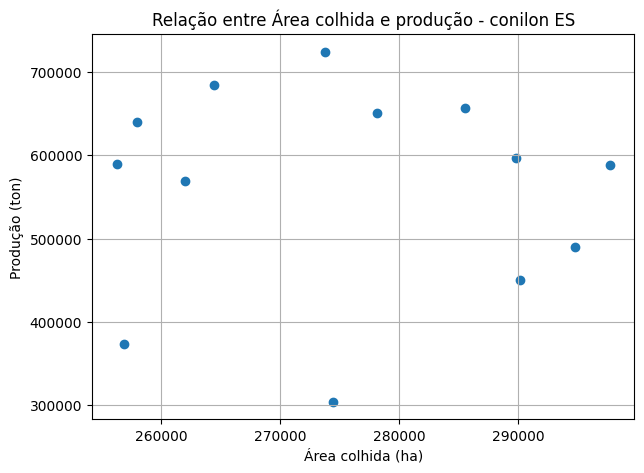

In [18]:
#Gráfico de Área colhida × Produção (dispersão)
plt.figure(figsize=(7,5))
plt.scatter(df_final['area_colhida_ha'], df_final['producao_ton'])

plt.xlabel('Área colhida (ha)')
plt.ylabel('Produção (ton)')
plt.title('Relação entre Área colhida e produção - conilon ES')

plt.grid(True)
plt.show()

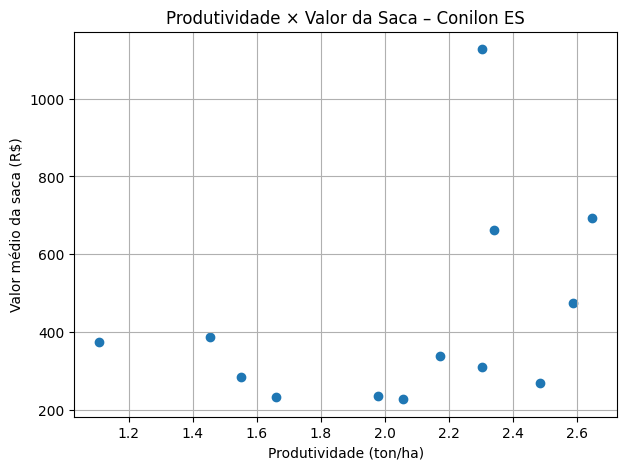

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(df_final['produtividade_ton_ha'], df_final['valor_med_saca_cafe'])

plt.xlabel('Produtividade (ton/ha)')
plt.ylabel('Valor médio da saca (R$)')
plt.title('Produtividade × Valor da Saca – Conilon ES')

plt.grid(True)
plt.show()


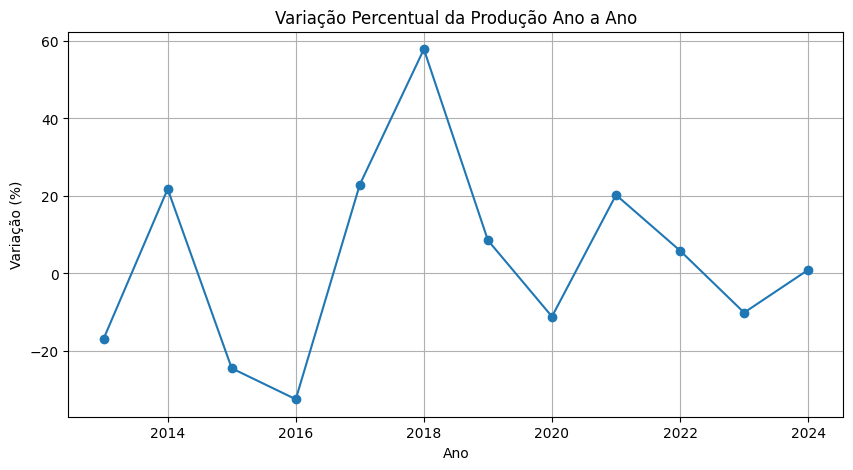

In [20]:
df_final['var_prod_pct'] = df_final['producao_ton'].pct_change() * 100

plt.figure(figsize=(10,5))
plt.plot(df_final['Ano'], df_final['var_prod_pct'], marker='o')

plt.title('Variação Percentual da Produção Ano a Ano')
plt.xlabel('Ano')
plt.ylabel('Variação (%)')
plt.grid(True)
plt.show()
